#### Main code to analyse the data for Doppler laser cooling

##### Libraries

In [1]:
#%pip install uncertainties
import pandas as pd
import math
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import csv
import statistics
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from uncertainties import ufloat as uf
from matplotlib.ticker import FormatStrFormatter
import uncertainties.unumpy as unp
from dateutil import parser

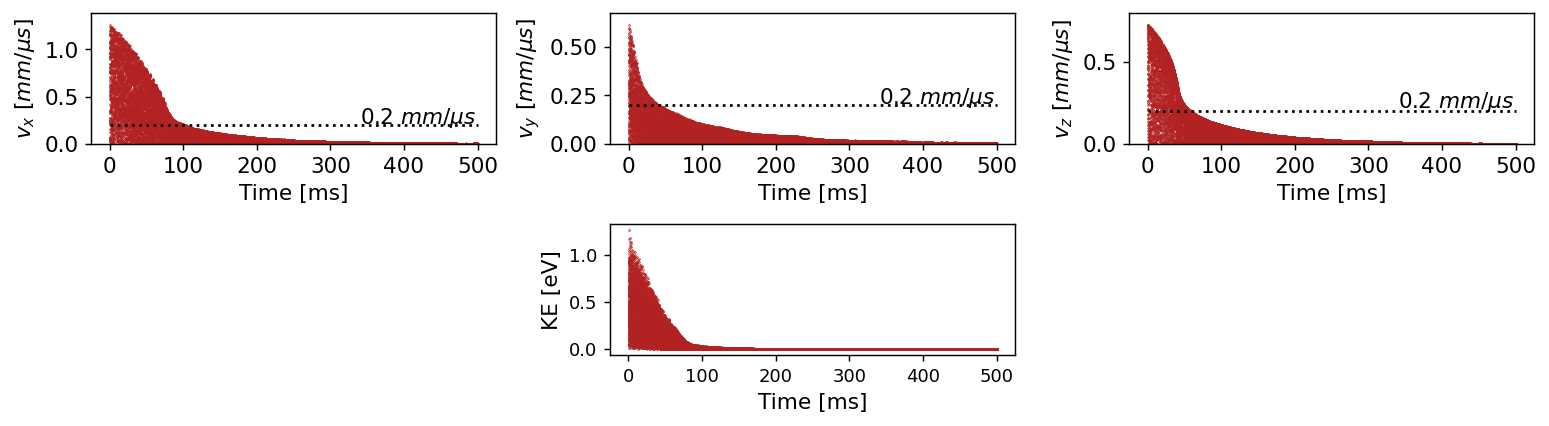

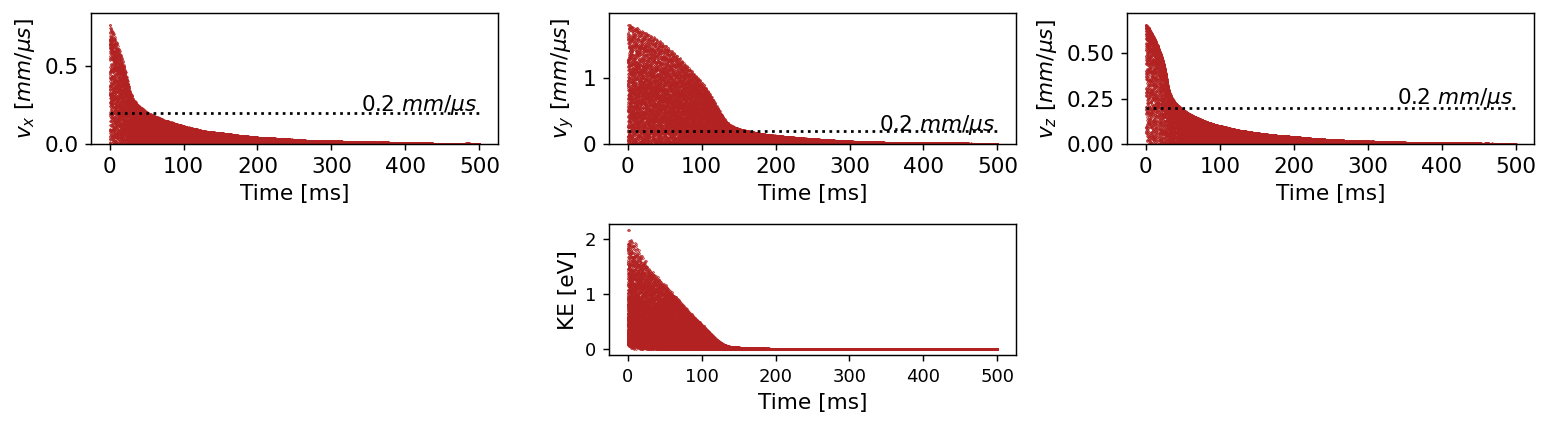

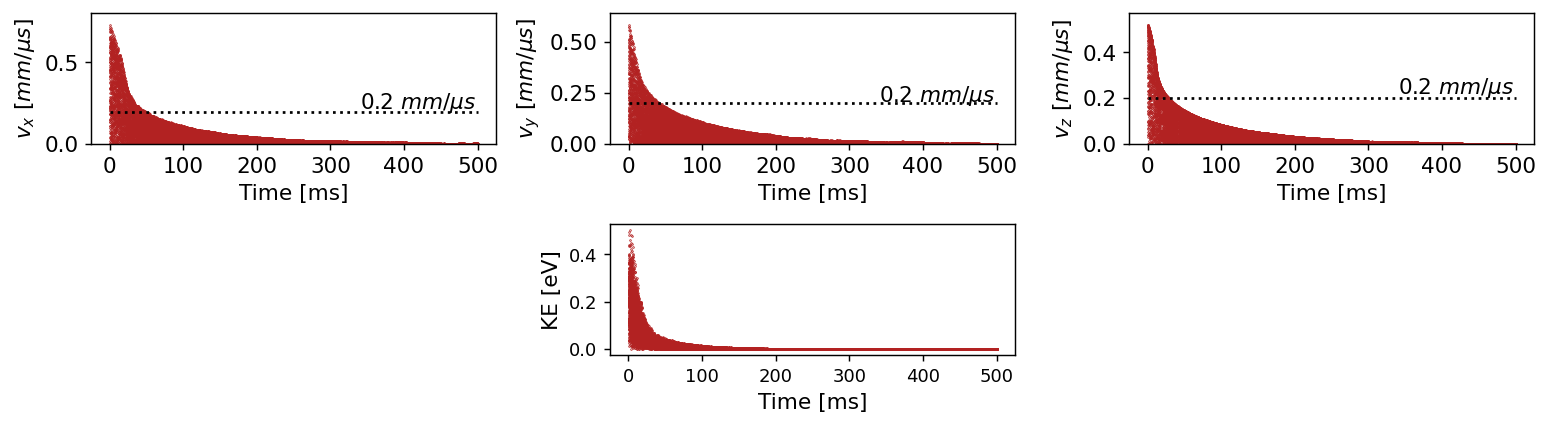

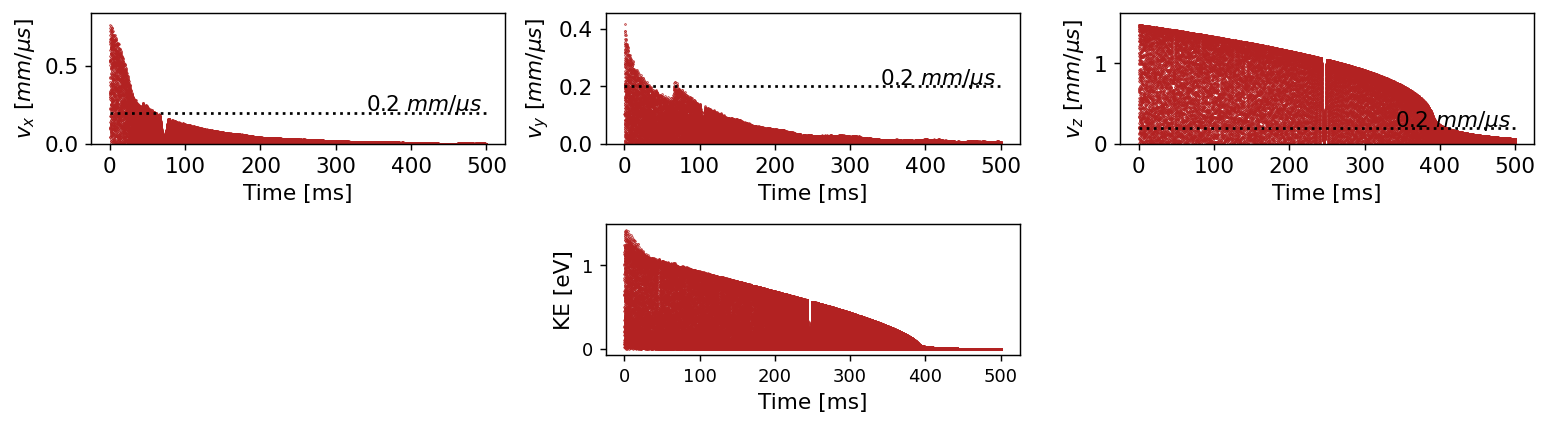

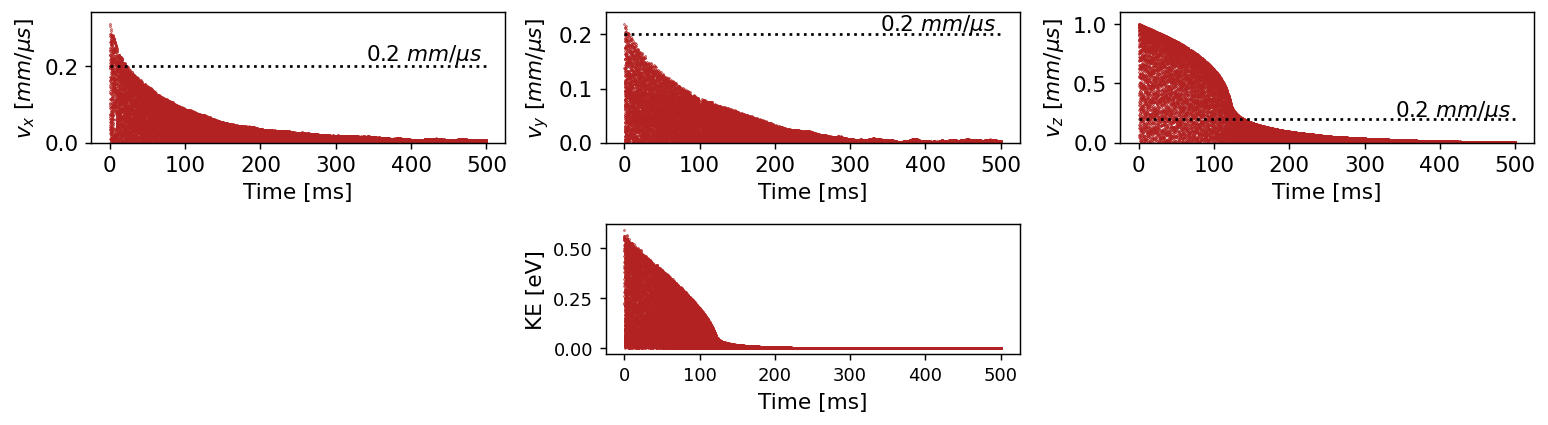

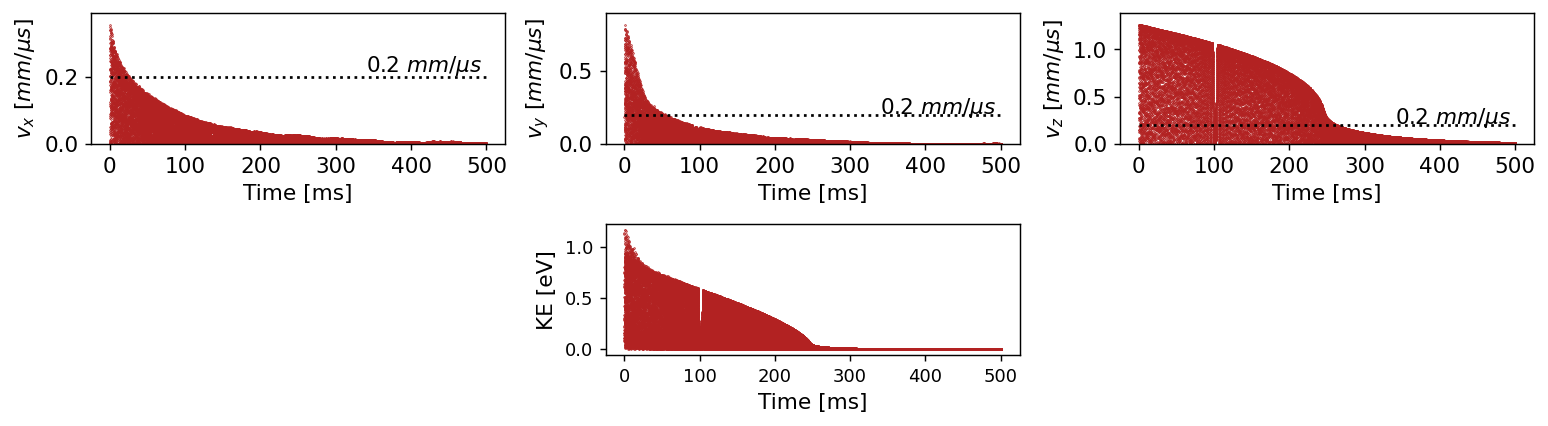

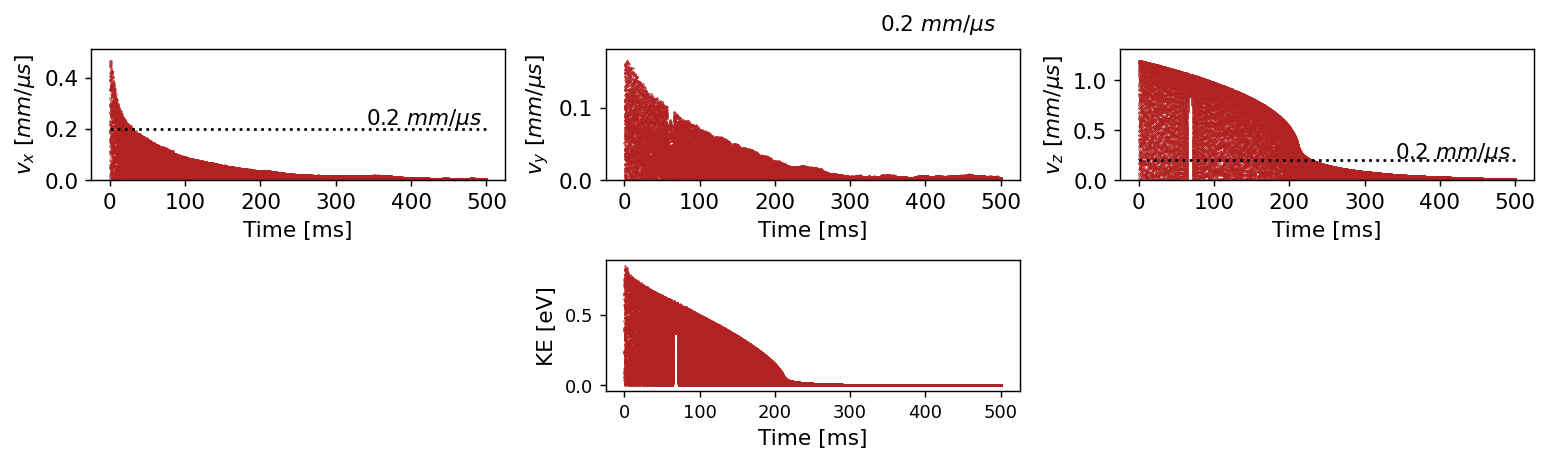

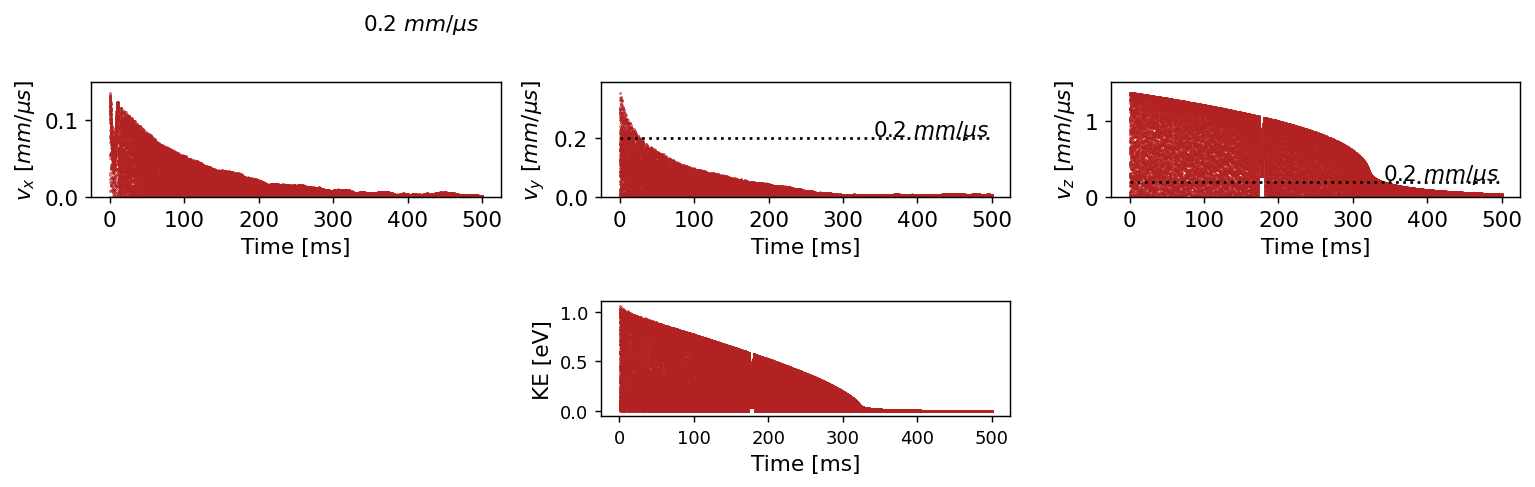

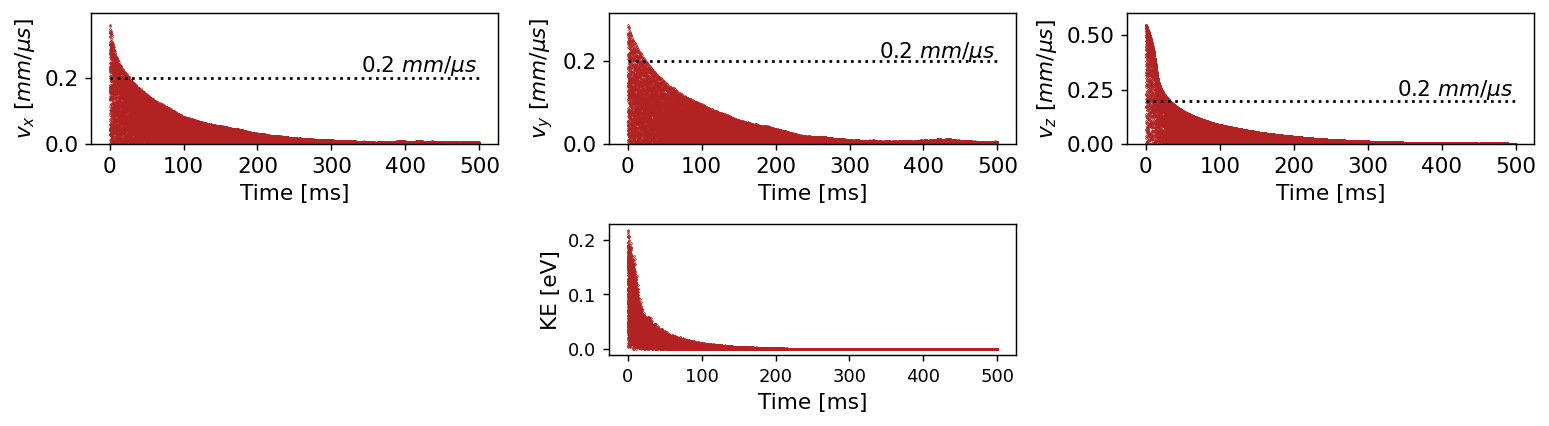

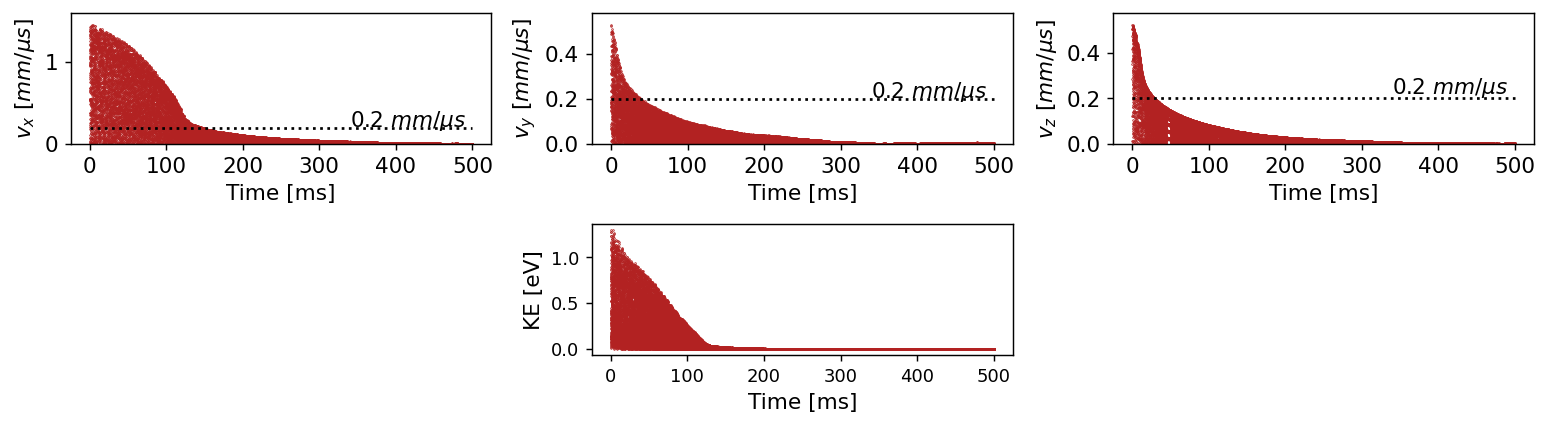

In [7]:
raw_data = pd.read_csv('C:/Users/stefa/OneDrive - KU Leuven/IonTrap_v4/v_long.txt', sep = ',', header=None, skip_blank_lines = True, names = ['ToF [mus]','x [mm]', 'y [mm]', 'z [mm]', 'v_x [mm/mus]', 'v_y [mm/mus]', 'v_z [mm/mus]', 'KE [eV]'], skiprows = 1, chunksize = 67638) #39897 #3971
i = 0 
for chunk in raw_data:
    if i < 10:
        chunk['ToF [mus]'].astype(float)
        chunk['KE [eV]'].astype(float)

        gs = gridspec.GridSpec(3,3)
        fig = plt.figure(figsize=(12, 5), dpi=130)
        # ax1 = fig.add_subplot(gs[0,0])
        # ax2 = fig.add_subplot(gs[0,1])
        # ax3 = fig.add_subplot(gs[0,2])
        ax4 = fig.add_subplot(gs[1,0])
        ax5 = fig.add_subplot(gs[1,1])
        ax6 = fig.add_subplot(gs[1,2])
        ax7 = fig.add_subplot(gs[2,1])

        # ax1.scatter(chunk['ToF [mus]']*0.001, chunk['x [mm]'], color = 'firebrick', marker = '.', s = 0.5)
        # ax2.scatter(chunk['ToF [mus]']*0.001, chunk['y [mm]'], color = 'firebrick', marker = '.', s = 0.5)
        # ax3.scatter(chunk['ToF [mus]']*0.001, chunk['z [mm]'], color = 'firebrick', marker = '.', s = 0.5)
        ax4.scatter(chunk['ToF [mus]']*0.001, chunk['v_x [mm/mus]'], color = 'firebrick', marker = '.', s = 0.5)
        ax5.scatter(chunk['ToF [mus]']*0.001, chunk['v_y [mm/mus]'], color = 'firebrick', marker = '.', s = 0.5)
        ax6.scatter(chunk['ToF [mus]']*0.001, chunk['v_z [mm/mus]'], color = 'firebrick', marker = '.', s = 0.5)
        ax7.scatter(chunk['ToF [mus]']*0.001, chunk['KE [eV]'], color = 'firebrick', marker = '.', s = 0.5)

        # ax1.set_xlabel('Time [ms]', fontsize = 12)
        # ax1.set_ylabel('x [mm]', fontsize = 12)
        # ax2.set_xlabel('Time [ms]', fontsize = 12)
        # ax2.set_ylabel('y [mm]', fontsize = 12)
        # ax3.set_xlabel('Time [ms]', fontsize = 12)
        # ax3.set_ylabel('z [mm]', fontsize = 12)

        ax4.set_xlabel('Time [ms]', fontsize = 12)
        ax4.set_ylabel('$v_x$ [$mm/\mu s$]', fontsize = 12)
        ax5.set_xlabel('Time [ms]', fontsize = 12)
        ax5.set_ylabel('$v_y$ [$mm/\mu s$]', fontsize = 12)
        ax6.set_xlabel('Time [ms]', fontsize = 12)
        ax6.set_ylabel('$v_z$ [$mm/\mu s$]', fontsize = 12)
        ax7.set_xlabel('Time [ms]', fontsize = 12)
        ax7.set_ylabel('KE [eV]', fontsize = 12)
        #ax7.set_yscale('log')
        #ax7.set_ylim(10^(-8),10)

        ax4.set_ylim(bottom = 0)
        ax5.set_ylim(bottom = 0)
        ax6.set_ylim(bottom = 0)

        ax4.hlines(y = 0.2, xmin = 0, xmax = 500, linestyle = 'dotted', color = 'black')
        ax5.hlines(y = 0.2, xmin = 0, xmax = 500, linestyle = 'dotted', color = 'black')
        ax6.hlines(y = 0.2, xmin = 0, xmax = 500, linestyle = 'dotted', color = 'black')
        ax4.text(340, 0.216, '0.2 $mm/\mu s$', fontsize = 12)
        ax5.text(340, 0.207, '0.2 $mm/\mu s$', fontsize = 12)
        ax6.text(340, 0.22, '0.2 $mm/\mu s$', fontsize = 12)
        # ax1.tick_params(axis = 'both', labelsize = 12)
        # ax2.tick_params(axis = 'both', labelsize = 12)
        # ax3.tick_params(axis = 'both', labelsize = 12)
        ax4.tick_params(axis = 'both', labelsize = 12)
        ax5.tick_params(axis = 'both', labelsize = 12)
        ax6.tick_params(axis = 'both', labelsize = 12)
        
        fig.tight_layout()
        #plt.savefig('C:/Users/stefa/OneDrive - KU Leuven/IonTrap_v4/Figures/no_doppler_cooling_3D_big.png', dpi = 150)
        plt.show()

    i += 1
    


#### Trajectory systematics

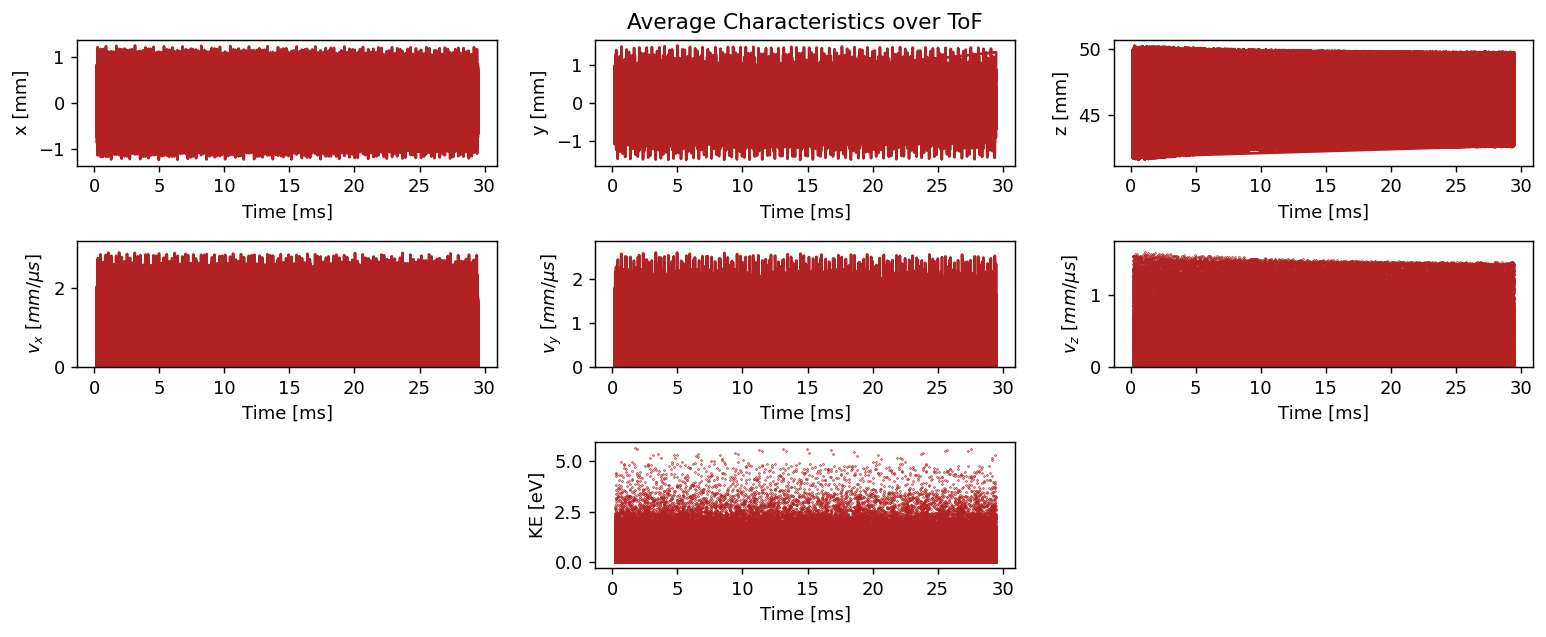

In [17]:
raw_data = pd.read_csv('C:/Users/r0867867/OneDrive - KU Leuven/IonTrap_v4/Data/v_real.txt', sep = ',', header=None, skip_blank_lines = True, names = ['ToF [mus]','x [mm]', 'y [mm]', 'z [mm]', 'v_x [mm/mus]', 'v_y [mm/mus]', 'v_z [mm/mus]', 'KE [eV]'], skiprows = 1)

Entries = np.linspace(0, (len(raw_data.index)-1)*0.00739, len(raw_data.index))

gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(12, 5), dpi=130)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,1])

ax1.plot(raw_data['ToF [mus]']*0.001, raw_data['x [mm]'], color = 'firebrick')
ax2.plot(raw_data['ToF [mus]']*0.001, raw_data['y [mm]'], color = 'firebrick')
ax3.plot(raw_data['ToF [mus]']*0.001, raw_data['z [mm]'], color = 'firebrick')
ax4.plot(raw_data['ToF [mus]']*0.001, raw_data['v_x [mm/mus]'], color = 'firebrick')
ax5.plot(raw_data['ToF [mus]']*0.001, raw_data['v_y [mm/mus]'], color = 'firebrick')
ax6.scatter(raw_data['ToF [mus]']*0.001, raw_data['v_z [mm/mus]'], color = 'firebrick', marker = '.', s = 0.5)
ax7.scatter(raw_data['ToF [mus]']*0.001, raw_data['KE [eV]'], color = 'firebrick', marker = '.', s = 0.5)

extra_x = raw_data.loc[raw_data['KE [eV]'] <= 10, 'ToF [mus]']
extra_y = raw_data.loc[raw_data['KE [eV]'] <= 10, 'KE [eV]']

ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('x [mm]')
ax2.set_xlabel('Time [ms]')
ax2.set_ylabel('y [mm]')
ax3.set_xlabel('Time [ms]')
ax3.set_ylabel('z [mm]')
ax2.set_title('Average Characteristics over ToF')

ax4.set_xlabel('Time [ms]')
ax4.set_ylabel('$v_x$ [$mm/\mu s$]')
ax5.set_xlabel('Time [ms]')
ax5.set_ylabel('$v_y$ [$mm/\mu s$]')
ax6.set_xlabel('Time [ms]')
ax6.set_ylabel('$v_z$ [$mm/\mu s$]')
ax7.set_xlabel('Time [ms]')
ax7.set_ylabel('KE [eV]')

ax4.set_ylim(bottom = 0)
ax5.set_ylim(bottom = 0)
ax6.set_ylim(bottom = 0)

# ax4.hlines(y = 2.5, xmin = 0, xmax = 30)
# ax5.hlines(y = 2.0, xmin = 0, xmax = 30)
# ax6.hlines(y = 1.6, xmin = 0, xmax = 30)

fig.tight_layout()
#plt.savefig('C:/Users/stefa/OneDrive - KU Leuven/IonTrap_v4/Figures/v_test5.png', dpi = 150)
plt.show()

# plt.plot(extra_x*0.001, extra_y, color = 'firebrick')
# plt.show()

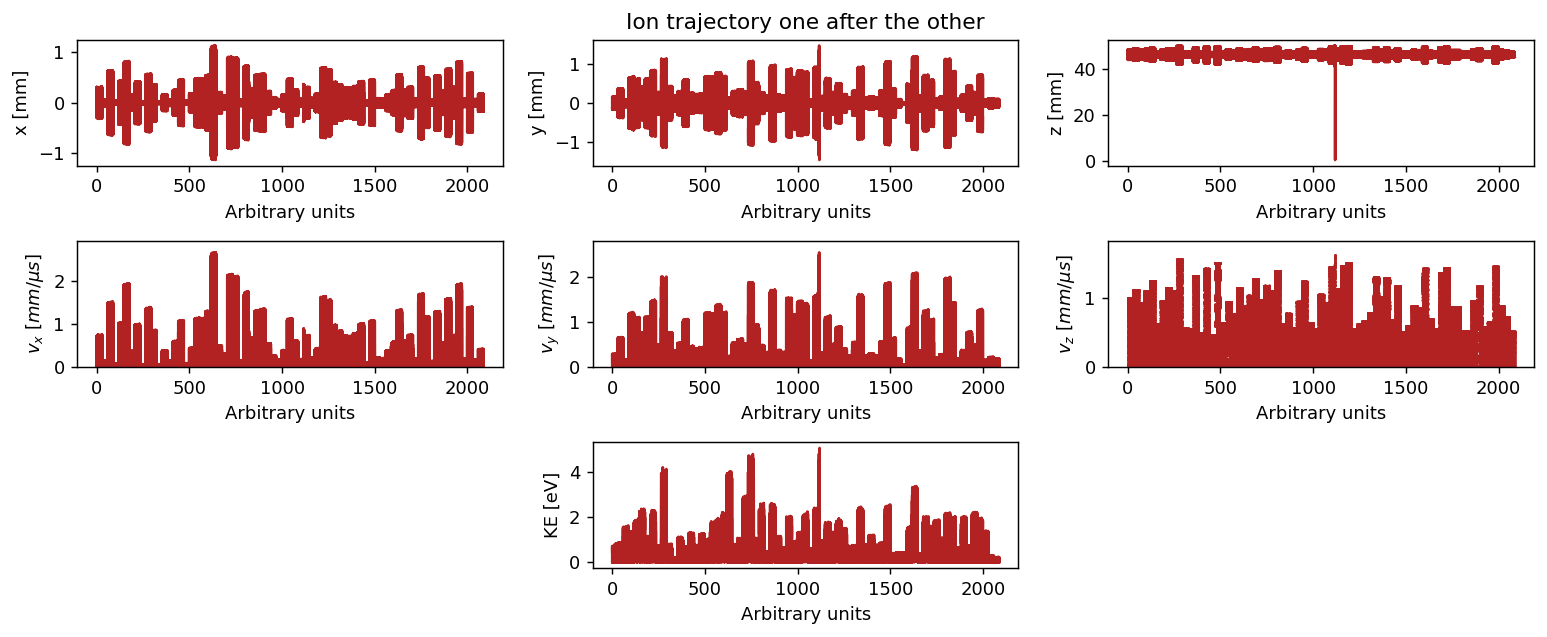

In [18]:
raw_data = pd.read_csv('C:/Users/r0867867/OneDrive - KU Leuven/IonTrap_v4/Data/no_doppler_cooling_3D_big.txt', sep = ',', header=None, skip_blank_lines = True, names = ['ToF [mus]','x [mm]', 'y [mm]', 'z [mm]', 'v_x [mm/mus]', 'v_y [mm/mus]', 'v_z [mm/mus]', 'KE [eV]'], skiprows = 1)

Entries = np.linspace(0, (len(raw_data.index)-1)*0.00739, len(raw_data.index))

gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(12, 5), dpi=130)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,1])

start = 39897*0 # 39897
stop = 39897*100

ax1.plot(Entries[start:stop], raw_data['x [mm]'][start:stop], color = 'firebrick')
ax2.plot(Entries[start:stop], raw_data['y [mm]'][start:stop], color = 'firebrick')
ax3.plot(Entries[start:stop], raw_data['z [mm]'][start:stop], color = 'firebrick')
ax4.plot(Entries[start:stop], raw_data['v_x [mm/mus]'][start:stop], color = 'firebrick')
ax5.plot(Entries[start:stop], raw_data['v_y [mm/mus]'][start:stop], color = 'firebrick')
ax6.scatter(Entries[start:stop], raw_data['v_z [mm/mus]'][start:stop], color = 'firebrick', marker = '.', s = 0.5)
ax7.plot(Entries[start:stop], raw_data['KE [eV]'][start:stop], color = 'firebrick')

ax1.set_xlabel('Arbitrary units')
ax1.set_ylabel('x [mm]')
ax2.set_xlabel('Arbitrary units')
ax2.set_ylabel('y [mm]')
ax3.set_xlabel('Arbitrary units')
ax3.set_ylabel('z [mm]')
ax4.set_xlabel('Arbitrary units')
ax4.set_ylabel('$v_x$ [$mm/\mu s$]')
ax5.set_xlabel('Arbitrary units')
ax5.set_ylabel('$v_y$ [$mm/\mu s$]')
ax6.set_xlabel('Arbitrary units')
ax6.set_ylabel('$v_z$ [$mm/\mu s$]')
ax7.set_xlabel('Arbitrary units')
ax7.set_ylabel('KE [eV]')
ax2.set_title('Ion trajectory one after the other')

ax4.set_ylim(bottom = 0)
ax5.set_ylim(bottom = 0)
ax6.set_ylim(bottom = 0)

fig.tight_layout()
#plt.savefig('C:/Users/stefa/OneDrive - KU Leuven/IonTrap_v4/Figures/v_test7.png', dpi = 150)
plt.show()

#### Experimental plots on KE and SR with a common x-axis

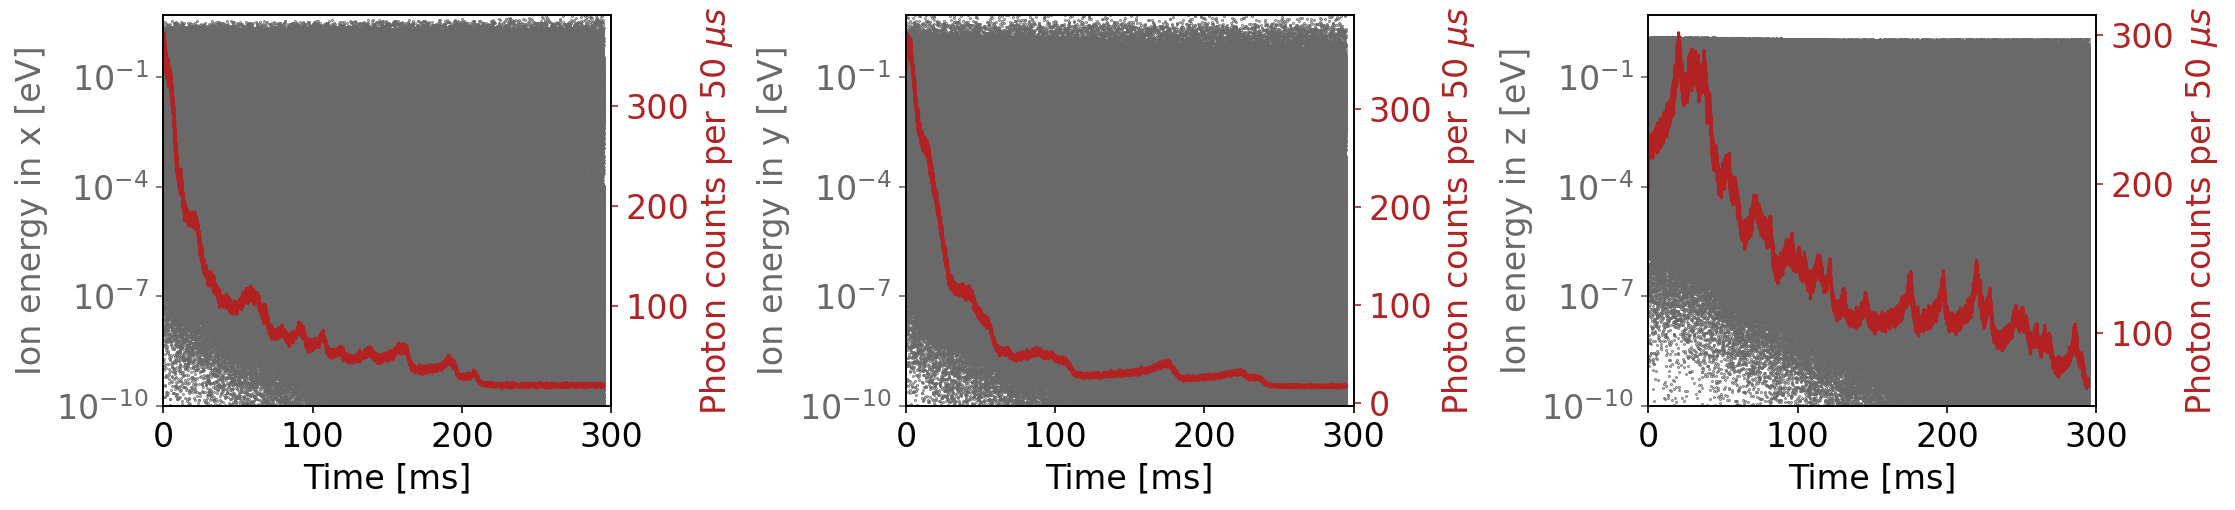

In [19]:
raw_data_SRx = pd.read_csv('C:/Users/r0867867/OneDrive - KU Leuven/IonTrap_v4/Data/SR_v_test4_x.txt', sep = ',', header=None, skip_blank_lines = True, names = ['ToF [mus]', 'KE [eV]', 'SR']) # , skiprows = 258038, nrows = 272175
raw_data_SRy = pd.read_csv('C:/Users/r0867867/OneDrive - KU Leuven/IonTrap_v4/Data/SR_v_test4_y.txt', sep = ',', header=None, skip_blank_lines = True, names = ['ToF [mus]', 'KE [eV]', 'SR']) # , skiprows = 282637, nrows = 220175
raw_data_SRz = pd.read_csv('C:/Users/r0867867/OneDrive - KU Leuven/IonTrap_v4/Data/SR_v_test4_z.txt', sep = ',', header=None, skip_blank_lines = True, names = ['ToF [mus]', 'KE [eV]', 'SR']) # , skiprows = 313269, nrows = 256999

# # This print one entry per 7.39 mus
# raw_data_SR_v2 = pd.read_csv('C:/Users/stefa/OneDrive - KU Leuven/IonTrap_v4/Data/SR_v_test6.txt', sep = ',', header=None, skip_blank_lines = True, names = ['ToF [mus]', 'KE [eV]', 'SRx', 'SRy', 'SRz']) 
# Entries = np.linspace(0,len(raw_data_SR_v2.index)-1,len(raw_data_SR_v2.index))

# gs = gridspec.GridSpec(1,3)
# fig = plt.figure(figsize=(14, 3), dpi=130)
# ax1 = fig.add_subplot(gs[0,0])
# ax3 = fig.add_subplot(gs[0,1])
# ax5 = fig.add_subplot(gs[0,2])

# ax1.scatter(raw_data_SR_v2['ToF [mus]']*0.001, raw_data_SR_v2['KE [eV]'], color = "dimgray", marker = ".", s = 0.5)
# ax1.set_xlabel("Time [ms]", fontsize = 14)
# ax1.set_ylabel("Ion energy [eV]", color="dimgray", fontsize=14)
# ax1.tick_params(axis='y', colors='dimgray', labelsize = 14)
# ax1.tick_params(axis='x', labelsize = 14)
# ax1.set_ylim(bottom = 0)
# ax1.set_title('Not accompaning Scattering in x-axis', fontsize = 14)

# ax2 = ax1.twinx()
# ax2.scatter(raw_data_SR_v2['ToF [mus]']*0.001, raw_data_SR_v2['SRx'], color = "firebrick", marker = ".", s = 0.5)
# ax2.set_ylabel("Scattering Rate x-axis", color = "firebrick", fontsize = 14)
# ax2.tick_params(axis='y', colors='firebrick', labelsize = 14)
# #ax2.set_ylim(0,1)

# ax3.scatter(raw_data_SR_v2['ToF [mus]']*0.001, raw_data_SR_v2['KE [eV]'], color = "dimgray", marker = ".", s = 0.5)
# ax3.set_xlabel("Time [ms]", fontsize = 14)
# ax3.set_ylabel("Ion energy [eV]", color="dimgray", fontsize=14)
# ax3.tick_params(axis='y', colors='dimgray', labelsize = 14)
# ax3.tick_params(axis='x', labelsize = 14)
# ax3.set_ylim(bottom = 0)
# ax3.set_title('Not accompaning Scattering in y-axis', fontsize = 14)

# ax4 = ax3.twinx()
# ax4.scatter(raw_data_SR_v2['ToF [mus]']*0.001, raw_data_SR_v2['SRy'], color = "firebrick", marker = ".", s = 0.5)
# ax4.set_ylabel("Scattering Rate y-axis", color = "firebrick", fontsize = 14)
# ax4.tick_params(axis='y', colors='firebrick', labelsize = 14)
# #ax4.set_ylim(0,1)

# ax5.scatter(raw_data_SR_v2['ToF [mus]']*0.001, raw_data_SR_v2['KE [eV]'], color = "dimgray", marker = ".", s = 0.5)
# ax5.set_xlabel("Time [ms]", fontsize = 14)
# ax5.set_ylabel("Ion energy [eV]", color="dimgray", fontsize=14)
# ax5.tick_params(axis='y', colors='dimgray', labelsize = 14)
# ax5.tick_params(axis='x', labelsize = 14)
# ax5.set_ylim(bottom = 0)
# ax5.set_title('Not accompaning Scattering in z-axis', fontsize = 14)

# ax6 = ax5.twinx()
# ax6.scatter(raw_data_SR_v2['ToF [mus]']*0.001, raw_data_SR_v2['SRz'], color = "firebrick", marker = ".", s = 0.5)
# ax6.set_ylabel("Scattering Rate z-axis", color = "firebrick", fontsize = 14)
# ax6.tick_params(axis='y', colors='firebrick', labelsize = 14)
# #ax6.set_ylim(0,1)
# fig.tight_layout()
# plt.show()

###############################################################################################################################################
###############################################################################################################################################
# Let's make some copies of the important columns

raw_data_SRx_ToF_copy = raw_data_SRx['ToF [mus]']
raw_data_SRx_ToF_copy = [i/1000 for i in raw_data_SRx_ToF_copy]
raw_data_SRx_KE_copy = raw_data_SRx['KE [eV]']

raw_data_SRx['ToF [mus]'] = raw_data_SRx['ToF [mus]'].apply(lambda x: x*1000)
raw_data_SRx['ToF [mus]'] = pd.to_datetime(raw_data_SRx['ToF [mus]'], unit = 'ns') # Now we have mus as units
raw_data_SRx_grouped = raw_data_SRx.groupby(pd.Grouper(key="ToF [mus]", freq="50U"), dropna = True).sum()

SRx_grouped = raw_data_SRx_grouped['SR']
ToF_groupedx = np.arange(0, len(SRx_grouped)*50,50).tolist()
ToF_groupedx = [x/1000 for x in ToF_groupedx]


raw_data_SRy_ToF_copy = raw_data_SRy['ToF [mus]']
raw_data_SRy_ToF_copy = [i/1000 for i in raw_data_SRy_ToF_copy]
raw_data_SRy_KE_copy = raw_data_SRy['KE [eV]']

raw_data_SRy['ToF [mus]'] = raw_data_SRy['ToF [mus]'].apply(lambda x: x*1000)
raw_data_SRy['ToF [mus]'] = pd.to_datetime(raw_data_SRy['ToF [mus]'], unit = 'ns') # Now we have mus as units
raw_data_SRy_grouped = raw_data_SRy.groupby(pd.Grouper(key="ToF [mus]", freq="50U"), dropna = True).sum()

SRy_grouped = raw_data_SRy_grouped['SR']
ToF_groupedy = np.arange(0, len(SRy_grouped)*50,50).tolist()
ToF_groupedy = [x/1000 for x in ToF_groupedy]


raw_data_SRz_ToF_copy = raw_data_SRz['ToF [mus]']
raw_data_SRz_ToF_copy = [i/1000 for i in raw_data_SRz_ToF_copy]
raw_data_SRz_KE_copy = raw_data_SRz['KE [eV]']

raw_data_SRz['ToF [mus]'] = raw_data_SRz['ToF [mus]'].apply(lambda x: x*1000)
raw_data_SRz['ToF [mus]'] = pd.to_datetime(raw_data_SRz['ToF [mus]'], unit = 'ns') # Now we have mus as units
raw_data_SRz_grouped = raw_data_SRz.groupby(pd.Grouper(key="ToF [mus]", freq="50U"), dropna = True).sum()

SRz_grouped = raw_data_SRz_grouped['SR']
ToF_groupedz = np.arange(0, len(SRz_grouped)*50,50).tolist()
ToF_groupedz = [x/1000 for x in ToF_groupedz]

##################################################################################################

gs = gridspec.GridSpec(1,3)
fig = plt.figure(figsize=(15, 3.5), dpi=150)
ax1 = fig.add_subplot(gs[0,0])
ax3 = fig.add_subplot(gs[0,1])
ax5 = fig.add_subplot(gs[0,2])

ax1.scatter(raw_data_SRx_ToF_copy, raw_data_SRx_KE_copy, color = "dimgray", marker = ".", s = 0.5)
ax1.set_xlabel("Time [ms]", fontsize = 16)
ax1.set_ylabel("Ion energy in x [eV]", color="dimgray", fontsize=16)
ax1.tick_params(axis='y', colors='dimgray', labelsize = 16)
ax1.set_xlim(0,30)
# ax1.set_xlim(0,50)

ax2 = ax1.twinx()
ax2.plot(ToF_groupedx, SRx_grouped, color = "firebrick")
ax2.set_ylabel("Photon counts per 50 $\mu s$", color = "firebrick", fontsize = 16)
ax2.tick_params(axis='y', colors='firebrick', labelsize = 16)
ax1.tick_params(axis='x', labelsize = 16)
ax1.set_xlim(0,300)
ax1.set_yscale('log')
ax1.set_ylim(10**(-10),5)

ax3.scatter(raw_data_SRy_ToF_copy, raw_data_SRy_KE_copy, color = "dimgray", marker = ".", s = 0.5)
ax3.set_xlabel("Time [ms]", fontsize = 16)
ax3.set_ylabel("Ion energy in y [eV]", color="dimgray", fontsize=16)
ax3.tick_params(axis='y', colors='dimgray', labelsize = 16)
ax3.set_yscale('log')
ax3.set_ylim(10**(-10),5)
ax3.set_xlim(0,300)

ax4 = ax3.twinx()
ax4.plot(ToF_groupedy, SRy_grouped, color = "firebrick")
ax4.set_ylabel("Photon counts per 50 $\mu s$", color = "firebrick", fontsize = 16)
ax4.tick_params(axis='y', colors='firebrick', labelsize = 16)
ax3.tick_params(axis='x', labelsize = 16)
ax4.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax5.scatter(raw_data_SRz_ToF_copy, raw_data_SRz_KE_copy, color = "dimgray", marker = ".", s = 0.5)
ax5.set_xlabel("Time [ms]", fontsize = 16)
ax5.set_ylabel("Ion energy in z [eV]", color="dimgray", fontsize=16)
ax5.tick_params(axis='y', colors='dimgray', labelsize = 16)
ax5.set_yscale('log')
ax5.set_ylim(10**(-10),5)
ax5.set_xlim(0,300)
# ax5.set_xlim(0,220)

ax6 = ax5.twinx()
ax6.plot(ToF_groupedz, SRz_grouped, color = "firebrick")
ax6.set_ylabel("Photon counts per 50 $\mu s$", color = "firebrick", fontsize = 16)
ax6.tick_params(axis='y', colors='firebrick', labelsize = 16)
ax5.tick_params(axis='x', labelsize = 16)


# ax1.hlines(y = 8.617*10**(-8), xmin = 0, xmax = 300)
# ax3.hlines(y = 8.617*10**(-8), xmin = 0, xmax = 300)
# ax5.hlines(y = 8.617*10**(-8), xmin = 0, xmax = 300)
# ax5.vlines(x = 197, ymin = 0, ymax = 0.4)

fig.tight_layout()
#plt.savefig('C:/Users/r0867867/OneDrive - KU Leuven/IonTrap_v4/Figures/SR_v_test4.png', dpi = 130)
plt.show()


#### Various histograms

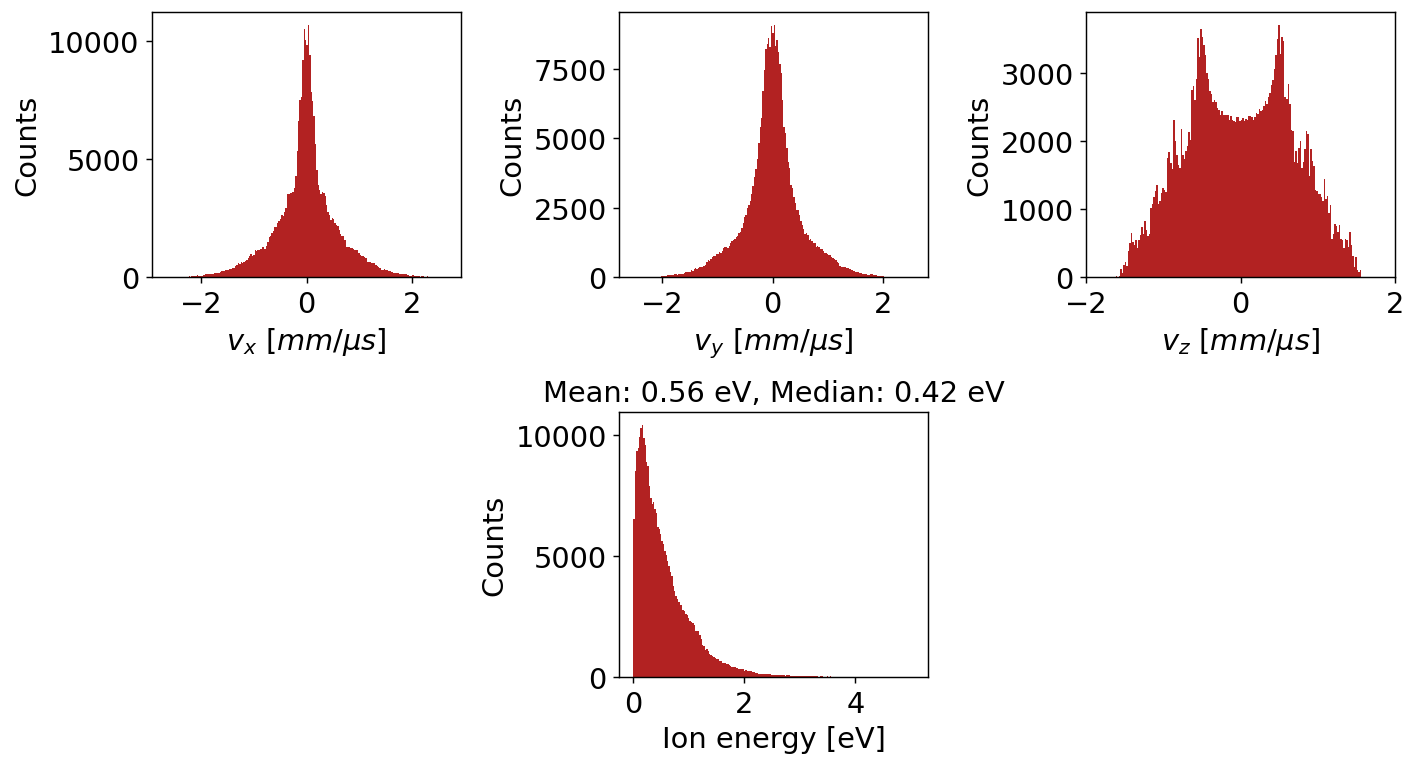

In [20]:
gs = gridspec.GridSpec(2,3)
fig = plt.figure(figsize=(11, 6), dpi=130)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,1])

start = 39897*0
stop = 39897*100

ax1.hist(raw_data['v_x [mm/mus]'][start:stop], bins = 200, color = 'firebrick')
ax2.hist(raw_data['v_y [mm/mus]'][start:stop], bins = 200, color = 'firebrick')
ax3.hist(raw_data['v_z [mm/mus]'][start:stop], bins = 200, color = 'firebrick')
ax4.hist(raw_data['KE [eV]'][start:stop], bins = 200, color = 'firebrick')

ax1.set_xlabel('$v_x$ [$mm/\mu s$]', fontsize = 16)
ax1.set_ylabel('Counts', fontsize = 16)
ax2.set_xlabel('$v_y$ [$mm/\mu s$]', fontsize = 16)
ax2.set_ylabel('Counts', fontsize = 16)
ax3.set_xlabel('$v_z$ [$mm/\mu s$]', fontsize = 16)
ax3.set_ylabel('Counts', fontsize = 16)
ax4.set_xlabel('Ion energy [eV]', fontsize = 16)
ax4.set_ylabel('Counts', fontsize = 16)

# ax1.set_xlim(left = 0)
# ax2.set_xlim(left = 0)
# ax3.set_xlim(left = 0)

# ax1.vlines(x = 0.278, ymin = 0, ymax = 10000)
# ax1.vlines(x = - 0.278, ymin = 0, ymax = 10000)
# ax2.vlines(x = 0.278, ymin = 0, ymax = 10000)
# ax2.vlines(x = -0.278, ymin = 0, ymax = 10000)
#ax3.vlines(x = 0.278, ymin = 0, ymax = 5000)

ax1.tick_params(axis='x', labelsize = 16)
ax1.tick_params(axis='y', labelsize = 16)
ax2.tick_params(axis='x', labelsize = 16)
ax2.tick_params(axis='y', labelsize = 16)
ax3.tick_params(axis='x', labelsize = 16)
ax3.tick_params(axis='y', labelsize = 16)
ax4.tick_params(axis='x', labelsize = 16)
ax4.tick_params(axis='y', labelsize = 16)
ax3.set_xlim(-2,2)

ax4.set_title('Mean: ' + str(round(raw_data['KE [eV]'].mean(),2)) + ' eV, ' + 'Median: ' + str(round(raw_data['KE [eV]'].median(),2)) + ' eV', fontsize = 16)

fig.tight_layout()
plt.savefig('C:/Users/pelon/OneDrive - KU Leuven/IonTrap_v4/Figures/no_doppler_cooling_3D_big_hist.png', dpi = 150)
plt.show()

In [16]:
c = 299792.458 # mm/mus
Gamma = 135*10**6 # Hz # 135
v_aver = 1.5 # mm/mus
omega_resonance = c*10**(12)/422 # Hz

omega_laser = (omega_resonance - Gamma/2)/(1 + v_aver/c)
print('f_0: ' + str(omega_resonance) + ' Hz')
print('f_las: ' + str(omega_laser) + ' Hz')
#print(omega_resonance)

# v_list = [1.4,1.2,1.0,0.8,0.6,0.5,0.4,0.3,0.2,0.1]

# omega_laser_list = [(omega_resonance - Gamma/2)/(1 + x/c) for x in v_list]
# print(omega_laser_list)

f_0: 710408668246445.5 Hz
f_las: 710405046262198.2 Hz


#### Updated histograms

In [4]:
chunksize = 5000*0.5 # Create one every 10 ms
raw_data = pd.read_csv('C:/Users/stefa/Desktop/IonTrap_v4/Data/various_frequencies_double.txt', sep = ',', header=None, skip_blank_lines = True, names = ['x [mm]', 'y [mm]', 'z [mm]', 'v_x [mm/mus]', 'v_y [mm/mus]', 'v_z [mm/mus]', 'KE [eV]'], skiprows = 1, chunksize = chunksize)

i = 0
for chunk in raw_data:
    i = i + 1
    velocity_distribution = [];
    #Entries = chunk.str.sum()
    velocity_distribution = chunk.loc[:,'v_z [mm/mus]']
    plt.hist(velocity_distribution, bins = 100)
    plt.xlabel('$v_z$ [$mm/ \mu s$]')
    plt.ylabel('Counts')
    plt.title('$T_{final}$ = ' + str(37*i*0.5) + ' ms')
    plt.xlim(-1.2,1.2)
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/stefa/Desktop/IonTrap_v4/Data/various_frequencies_double.txt'

#### Doppler Cooling

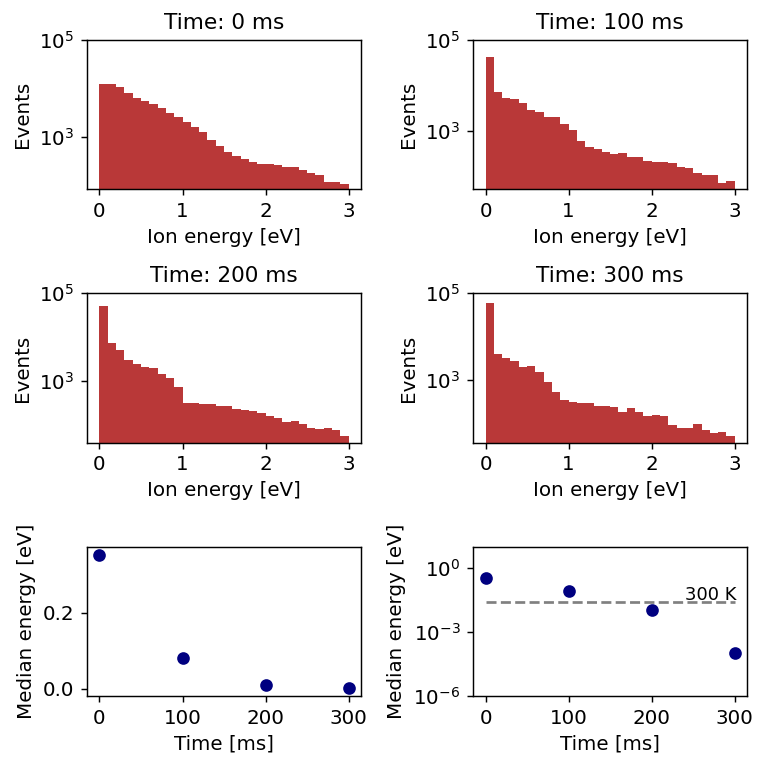

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

raw_data = pd.read_csv('C:/Users/r0867867/OneDrive - KU Leuven/IonTrap_v4/Data/v_test4.txt', sep = ',', header=None, skip_blank_lines = True, names = ['ToF [mus]','x [mm]', 'y [mm]', 'z [mm]', 'v_x [mm/mus]', 'v_y [mm/mus]', 'v_z [mm/mus]', 'KE [eV]'], skiprows = 1) #39897 #3971

KE_T1 = [];
KE_T2 = [];
KE_T3 = [];
KE_T4 = [];
test_T1 = [];
test_T2 = [];
test_T3 = [];
test_T4 = [];

for i in np.arange(0,80,1):
    for j in np.arange(0,1000,1):
        KE_T1.append(raw_data['KE [eV]'][39897*i + j])
        KE_T2.append(raw_data['KE [eV]'][39897*i + 13299 + j])
        KE_T3.append(raw_data['KE [eV]'][39897*i + 26598 + j])
        KE_T4.append(raw_data['KE [eV]'][39897*i + 39896 - j])

KE_T1 = np.array(KE_T1)
KE_T2 = np.array(KE_T2)
KE_T3 = np.array(KE_T3)
KE_T4 = np.array(KE_T4)

median_error_KE_T1 = 1.2533*np.std(KE_T1)/np.sqrt(len(KE_T1))
median_error_KE_T2 = 1.2533*np.std(KE_T2)/np.sqrt(len(KE_T2))
median_error_KE_T3 = 1.2533*np.std(KE_T3)/np.sqrt(len(KE_T3))
median_error_KE_T4 = 1.2533*np.std(KE_T4)/np.sqrt(len(KE_T4))

gs = gridspec.GridSpec(3,2, height_ratios = [1,1,1])
fig = plt.figure(figsize=(6, 6), dpi=130)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])

ax1.hist(KE_T1, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax1.set_xlabel('Ion energy [eV]', fontsize = 11)
ax1.set_ylabel('Events', fontsize = 11)
ax1.set_title('Time: 0 ms')
ax1.set_yscale('log')
ax1.tick_params(axis = 'both', labelsize = 11)

ax2.hist(KE_T2, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax2.set_xlabel('Ion energy [eV]', fontsize = 11)
ax2.set_ylabel('Events', fontsize = 11)
ax2.set_title('Time: 100 ms')
ax2.set_yscale('log')
ax2.tick_params(axis = 'both', labelsize = 11)

ax3.hist(KE_T3, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax3.set_xlabel('Ion energy [eV]', fontsize = 11)
ax3.set_ylabel('Events', fontsize = 11)
ax3.set_title('Time: 200 ms')
ax3.set_yscale('log')
ax3.tick_params(axis = 'both', labelsize = 11)

uu = ax4.hist(KE_T4, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax4.set_xlabel('Ion energy [eV]', fontsize = 11)
ax4.set_ylabel('Events', fontsize = 11)
ax4.set_title('Time: 300 ms')
ax4.set_yscale('log')
ax4.tick_params(axis = 'both', labelsize = 11)

x = [0, 100, 200, 300]
y = [np.median(KE_T1), np.median(KE_T2), np.median(KE_T3), np.median(KE_T4)]
yerr = [median_error_KE_T1, median_error_KE_T2, median_error_KE_T3, median_error_KE_T4]

ax5.errorbar(x, y = y, yerr = yerr, fmt = 'o', color = 'navy')
ax5.set_xlabel('Time [ms]', fontsize = 11)
ax5.set_ylabel('Median energy [eV]', fontsize = 11)
ax5.tick_params(axis = 'both', labelsize = 11)
ax5.set_xticks([0,100,200,300])

ax6.errorbar(x, y = y, fmt = 'o', color = 'navy')
ax6.set_xlabel('Time [ms]', fontsize = 11)
ax6.set_ylabel('Median energy [eV]', fontsize = 11)
ax6.tick_params(axis = 'both', labelsize = 11)
ax6.set_xticks([0,100,200,300])
ax6.set_yscale('log')
ax6.set_ylim(10**(-6), 10)
ax6.hlines(y = 0.0258, xmin = 0, xmax = 300, linestyle = '--', color = 'gray')
ax6.text(240,0.031, '300 K')
fig.tight_layout()

ax1.set_ylim(top = 100000)
ax2.set_ylim(top = 100000)
ax3.set_ylim(top = 100000)
ax4.set_ylim(top = 100000)

plt.show()

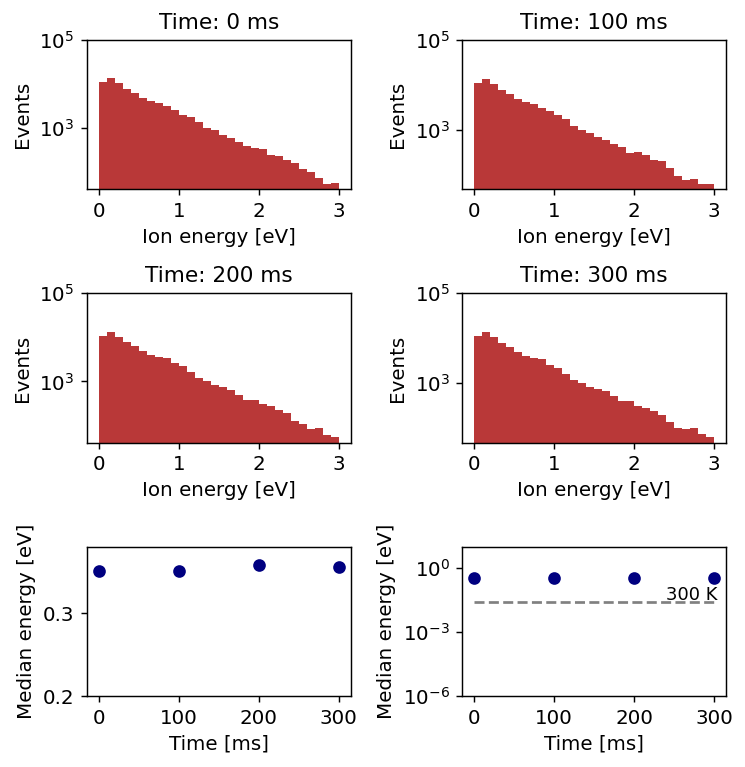

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

raw_data = pd.read_csv('C:/Users/r0867867/OneDrive - KU Leuven/IonTrap_v4/Data/v_real.txt', sep = ',', header=None, skip_blank_lines = True, names = ['ToF [mus]','x [mm]', 'y [mm]', 'z [mm]', 'v_x [mm/mus]', 'v_y [mm/mus]', 'v_z [mm/mus]', 'KE [eV]'], skiprows = 1) #39897 #3971

KE_T1 = [];
KE_T2 = [];
KE_T3 = [];
KE_T4 = [];
test_T1 = [];
test_T2 = [];
test_T3 = [];
test_T4 = [];

for i in np.arange(0,79,1):
    for j in np.arange(0,1000,1):
        KE_T1.append(raw_data['KE [eV]'][3971*i + j])
        KE_T2.append(raw_data['KE [eV]'][3971*i + 1324 + j])
        KE_T3.append(raw_data['KE [eV]'][3971*i + 2647 + j])
        KE_T4.append(raw_data['KE [eV]'][3971*i + 3970 - j])

    # KE_T1.append(np.mean(test_T1))
    # KE_T2.append(np.mean(test_T2))
    # KE_T3.append(np.mean(test_T3))
    # KE_T4.append(np.mean(test_T4))

KE_T1 = np.array(KE_T1)
KE_T2 = np.array(KE_T2)
KE_T3 = np.array(KE_T3)
KE_T4 = np.array(KE_T4)

median_error_KE_T1 = 1.2533*np.std(KE_T1)/np.sqrt(len(KE_T1))
median_error_KE_T2 = 1.2533*np.std(KE_T2)/np.sqrt(len(KE_T2))
median_error_KE_T3 = 1.2533*np.std(KE_T3)/np.sqrt(len(KE_T3))
median_error_KE_T4 = 1.2533*np.std(KE_T4)/np.sqrt(len(KE_T4))

gs = gridspec.GridSpec(3,2, height_ratios = [1,1,1])
fig = plt.figure(figsize=(6, 6), dpi=130)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])

ax1.hist(KE_T1, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax1.set_xlabel('Ion energy [eV]', fontsize = 11)
ax1.set_ylabel('Events', fontsize = 11)
ax1.set_title('Time: 0 ms')
ax1.set_yscale('log')
ax1.tick_params(axis = 'both', labelsize = 11)

ax2.hist(KE_T2, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax2.set_xlabel('Ion energy [eV]', fontsize = 11)
ax2.set_ylabel('Events', fontsize = 11)
ax2.set_title('Time: 100 ms')
ax2.set_yscale('log')
ax2.tick_params(axis = 'both', labelsize = 11)

ax3.hist(KE_T3, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax3.set_xlabel('Ion energy [eV]', fontsize = 11)
ax3.set_ylabel('Events', fontsize = 11)
ax3.set_title('Time: 200 ms')
ax3.set_yscale('log')
ax3.tick_params(axis = 'both', labelsize = 11)

uu = ax4.hist(KE_T4, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax4.set_xlabel('Ion energy [eV]', fontsize = 11)
ax4.set_ylabel('Events', fontsize = 11)
ax4.set_title('Time: 300 ms')
ax4.set_yscale('log')
ax4.tick_params(axis = 'both', labelsize = 11)

x = [0, 100, 200, 300]
y = [np.median(KE_T1), np.median(KE_T2), np.median(KE_T3), np.median(KE_T4)]
yerr = [median_error_KE_T1, median_error_KE_T2, median_error_KE_T3, median_error_KE_T4]

ax5.errorbar(x, y = y, yerr = yerr, fmt = 'o', color = 'navy')
ax5.set_xlabel('Time [ms]', fontsize = 11)
ax5.set_ylabel('Median energy [eV]', fontsize = 11)
ax5.tick_params(axis = 'both', labelsize = 11)
ax5.set_xticks([0,100,200,300])

ax6.errorbar(x, y = y, fmt = 'o', color = 'navy')
ax6.set_xlabel('Time [ms]', fontsize = 11)
ax6.set_ylabel('Median energy [eV]', fontsize = 11)
ax6.tick_params(axis = 'both', labelsize = 11)
ax6.set_xticks([0,100,200,300])
ax6.set_yscale('log')
ax6.set_ylim(10**(-6), 10)
ax6.hlines(y = 0.0258, xmin = 0, xmax = 300, linestyle = '--', color = 'gray')
ax6.text(240,0.031, '300 K')
fig.tight_layout()

ax1.set_ylim(top = 100000)
ax2.set_ylim(top = 100000)
ax3.set_ylim(top = 100000)
ax4.set_ylim(top = 100000)
ax5.set_ylim(0.2,0.38)

plt.show()

#### Let's repeat it for the longer version

(array([7.346e+04, 2.480e+02, 1.560e+02, 1.210e+02, 1.180e+02, 1.040e+02,
       1.010e+02, 1.010e+02, 9.500e+01, 1.100e+02, 9.900e+01, 9.500e+01,
       6.300e+01, 7.400e+01, 3.100e+01, 2.400e+01, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. ]), <BarContainer object of 30 artists>)


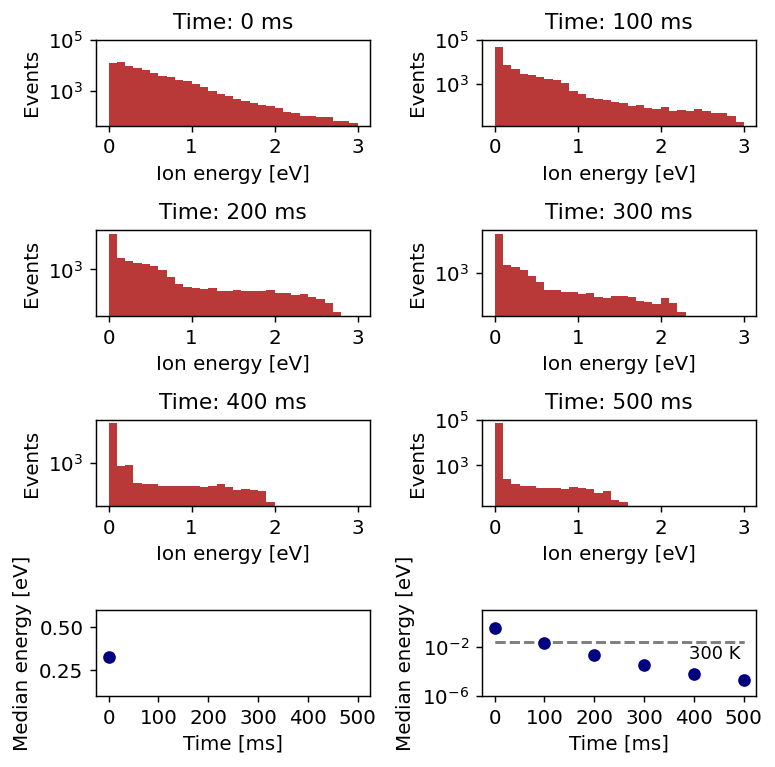

In [2]:
raw_data = pd.read_csv('C:/Users/stefa/OneDrive - KU Leuven/IonTrap_v4/v_long.txt', sep = ',', header=None, skip_blank_lines = True, names = ['ToF [mus]','x [mm]', 'y [mm]', 'z [mm]', 'v_x [mm/mus]', 'v_y [mm/mus]', 'v_z [mm/mus]', 'KE [eV]'], skiprows = 1) #39897 #3971

KE_T1 = [];
KE_T2 = [];
KE_T3 = [];
KE_T4 = [];
KE_T5 = [];
KE_T6 = [];
test_T1 = [];
test_T2 = [];
test_T3 = [];
test_T4 = [];
test_T5 = [];
test_T6 = [];

for i in np.arange(0,75,1):
    for j in np.arange(0,1000,1):
        KE_T1.append(raw_data['KE [eV]'][67638*i + j])
        KE_T2.append(raw_data['KE [eV]'][67638*i + 13530 + j])
        KE_T3.append(raw_data['KE [eV]'][67638*i + 27059 + j])
        KE_T4.append(raw_data['KE [eV]'][67638*i + 40589 - j])
        KE_T5.append(raw_data['KE [eV]'][67638*i + 54120 - j])
        KE_T6.append(raw_data['KE [eV]'][67638*i + 67637 - j])

KE_T1 = np.array(KE_T1)
KE_T2 = np.array(KE_T2)
KE_T3 = np.array(KE_T3)
KE_T4 = np.array(KE_T4)
KE_T5 = np.array(KE_T5)
KE_T6 = np.array(KE_T6)


median_error_KE_T1 = 1.2533*np.std(KE_T1)/np.sqrt(len(KE_T1))
median_error_KE_T2 = 1.2533*np.std(KE_T2)/np.sqrt(len(KE_T2))
median_error_KE_T3 = 1.2533*np.std(KE_T3)/np.sqrt(len(KE_T3))
median_error_KE_T4 = 1.2533*np.std(KE_T4)/np.sqrt(len(KE_T4))
median_error_KE_T5 = 1.2533*np.std(KE_T5)/np.sqrt(len(KE_T5))
median_error_KE_T6 = 1.2533*np.std(KE_T6)/np.sqrt(len(KE_T6))

gs = gridspec.GridSpec(4,2, height_ratios = [1,1,1,1])
fig = plt.figure(figsize=(6, 6), dpi=130)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,0])
ax6 = fig.add_subplot(gs[2,1])
ax7 = fig.add_subplot(gs[3,0])
ax8 = fig.add_subplot(gs[3,1])

ax1.hist(KE_T1, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax1.set_xlabel('Ion energy [eV]', fontsize = 11)
ax1.set_ylabel('Events', fontsize = 11)
ax1.set_title('Time: 0 ms')
ax1.set_yscale('log')
ax1.tick_params(axis = 'both', labelsize = 11)

ax2.hist(KE_T2, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax2.set_xlabel('Ion energy [eV]', fontsize = 11)
ax2.set_ylabel('Events', fontsize = 11)
ax2.set_title('Time: 100 ms')
ax2.set_yscale('log')
ax2.tick_params(axis = 'both', labelsize = 11)

ax3.hist(KE_T3, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax3.set_xlabel('Ion energy [eV]', fontsize = 11)
ax3.set_ylabel('Events', fontsize = 11)
ax3.set_title('Time: 200 ms')
ax3.set_yscale('log')
ax3.tick_params(axis = 'both', labelsize = 11)

ax4.hist(KE_T4, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax4.set_xlabel('Ion energy [eV]', fontsize = 11)
ax4.set_ylabel('Events', fontsize = 11)
ax4.set_title('Time: 300 ms')
ax4.set_yscale('log')
ax4.tick_params(axis = 'both', labelsize = 11)

ax5.hist(KE_T5, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax5.set_xlabel('Ion energy [eV]', fontsize = 11)
ax5.set_ylabel('Events', fontsize = 11)
ax5.set_title('Time: 400 ms')
ax5.set_yscale('log')
ax5.tick_params(axis = 'both', labelsize = 11)

uu = ax6.hist(KE_T6, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
ax6.set_xlabel('Ion energy [eV]', fontsize = 11)
ax6.set_ylabel('Events', fontsize = 11)
ax6.set_title('Time: 500 ms')
ax6.set_yscale('log')
ax6.tick_params(axis = 'both', labelsize = 11)

x = [0, 100, 200, 300, 400, 500]
y = [np.median(KE_T1), np.median(KE_T2), np.median(KE_T3), np.median(KE_T4), np.median(KE_T5), np.median(KE_T6)]
yerr = [median_error_KE_T1, median_error_KE_T2, median_error_KE_T3, median_error_KE_T4, median_error_KE_T5, median_error_KE_T6]

ax7.errorbar(x, y = y, yerr = yerr, fmt = 'o', color = 'navy')
ax7.set_xlabel('Time [ms]', fontsize = 11)
ax7.set_ylabel('Median energy [eV]', fontsize = 11)
ax7.tick_params(axis = 'both', labelsize = 11)
ax7.set_xticks([0,100,200,300,400,500])
ax7.set_ylim(bottom = 0.1, top = 0.6)

ax8.errorbar(x, y = y, fmt = 'o', color = 'navy')
ax8.set_xlabel('Time [ms]', fontsize = 11)
ax8.set_ylabel('Median energy [eV]', fontsize = 11)
ax8.tick_params(axis = 'both', labelsize = 11)
ax8.set_xticks([0,100,200,300,400,500])
ax8.set_yscale('log')
ax8.set_ylim(10**(-6), 10)
ax8.hlines(y = 0.0258, xmin = 0, xmax = 500, linestyle = '--', color = 'gray')
ax8.hlines(y = 0.0258, xmin = 0, xmax = 500, linestyle = '--', color = 'gray')
ax8.text(390,0.001, '300 K')

ax1.set_ylim(top = 100000)
ax2.set_ylim(top = 100000)
ax3.set_ylim(top = 100000)
ax4.set_ylim(top = 100000)
ax5.set_ylim(top = 100000)
ax6.set_ylim(top = 100000)
fig.tight_layout()
print(uu)
plt.show()

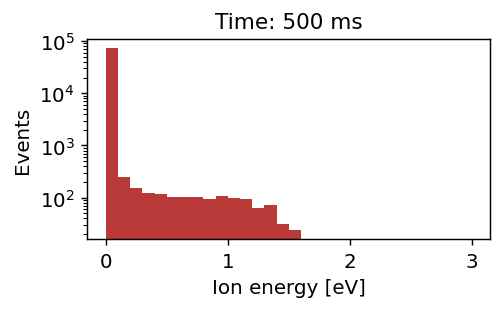

In [8]:
fig = plt.figure(figsize=(4, 2), dpi=130)
plt.hist(KE_T6, bins = 30, color = 'firebrick', alpha = 0.9, range = [0,3])
plt.xlabel('Ion energy [eV]', fontsize = 11)
plt.ylabel('Events', fontsize = 11)
plt.title('Time: 500 ms')
plt.yscale('log')
plt.tick_params(axis = 'both', labelsize = 11)
plt.show()